<a href="https://colab.research.google.com/github/ia234/Python_23/blob/main/Category_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reranking

In [1]:
from google.colab import drive

# drive.mount('/content/drive')
%cd /content/drive/MyDrive/ai_data/

/content/drive/MyDrive/ai_data


In [2]:
import pandas as pd

# index_col = 0 specify the first column as the index.
top_articles_df = pd.read_csv('/content/drive/MyDrive/ai_data/wikipedia_top_articles_2022.csv')
top_articles_df

,article,date,views,rank,Page ID,Categories,URL,Image,Summary
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",https://ar.wikipedia.org/wiki/%D9%8A%D9%88%D8%...,https://upload.wikimedia.org/wikipedia/commons...,يوتيوب (بالإنجليزية: YouTube)‏ هو موقع ويب يسم...
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,https://upload.wikimedia.org/wikipedia/commons...,كريستيانو رونالدو دوس سانتوس أفيرو (تلفظ برتغا...
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",https://ar.wikipedia.org/wiki/%D9%85%D8%AD%D9%...,https://upload.wikimedia.org/wikipedia/commons...,أَبُو القَاسِم مُحَمَّدُ بْنُ عَبْدِ ٱللَّهِ ب...
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",https://ar.wikipedia.org/wiki/%D8%A3%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,أبشر، هو نظام إلكتروني أطلقته وزارة الداخلية ا...
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,كأس العالم 2022 هي النسخة الثانية والعشرون من ...
...,...,...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/ar/e/ee...,الشيخ عبد الله بن سليمان المنيع (1349 هـ شقراء...
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,عبد الله رشدي (3 فبراير 1984) إمام وخطيب بوزار...
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,NaN,عبد الله عباس (7 أغسطس 1988) ممثل إيراني نشأ ف...
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,https://upload.wikimedia.org/wikipedia/commons...,البابا فرنسيس. (باللاتينية: Franciscus)، ولد ب...


In [3]:
import pandas as pd

# Assuming you have a DataFrame called top_articles_df
# Sort the DataFrame by 'rank' in descending order and 'views' in descending order
top_articles_df = top_articles_df.sort_values(by=['rank', 'views'], ascending=[False, False])

# Reset the index and drop the old index column
top_articles_df = top_articles_df.reset_index(drop=True)

# The resulting sorted DataFrame will have rows sorted by 'rank' in descending order,
# and when 'rank' values are equal, it will be sorted by 'views' in descending order.
top_articles_df

,article,date,views,rank,Page ID,Categories,URL,Image,Summary
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",https://ar.wikipedia.org/wiki/%D9%8A%D9%88%D8%...,https://upload.wikimedia.org/wikipedia/commons...,يوتيوب (بالإنجليزية: YouTube)‏ هو موقع ويب يسم...
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,https://upload.wikimedia.org/wikipedia/commons...,كريستيانو رونالدو دوس سانتوس أفيرو (تلفظ برتغا...
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",https://ar.wikipedia.org/wiki/%D9%85%D8%AD%D9%...,https://upload.wikimedia.org/wikipedia/commons...,أَبُو القَاسِم مُحَمَّدُ بْنُ عَبْدِ ٱللَّهِ ب...
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",https://ar.wikipedia.org/wiki/%D8%A3%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,أبشر، هو نظام إلكتروني أطلقته وزارة الداخلية ا...
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,كأس العالم 2022 هي النسخة الثانية والعشرون من ...
...,...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,بطولة آسيا تحت 23 سنة لكرة القدم 2022 (تعرف أي...
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']",https://ar.wikipedia.org/wiki/%D8%B9%D8%AB%D9%...,https://upload.wikimedia.org/wikipedia/commons...,عثمان بن محمد بن حمد بن عبد الله بن صالح بن مح...
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...",https://ar.wikipedia.org/wiki/%D8%B3%D8%AA%D9%...,https://upload.wikimedia.org/wikipedia/commons...,واردل ستيفن كاري الثاني (ولد في 14 مارس 1988) ...
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']",https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,NaN,البيت بيتي هو مسلسل رعب كوميدي مصري قادم من بط...


In [4]:
top_articles_df['Categories']

0       ['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...
1       ['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...
2       ['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...
3                 ['السعودية', 'برمجيات', 'حقوق الإنسان']
4       ['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...
                              ...                        
1627                                ['آسيا', 'كرة القدم']
1628                      ['أدب عربي', 'أعلام', 'الكويت']
1629    ['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...
1630                            ['تلفاز', 'تمثيل', 'مصر']
1631    ['أعلام', 'السينما الأمريكية', 'الولايات المتح...
Name: Categories, Length: 1632, dtype: object

In [5]:
# Convert 'Categories' into a Python list
categories_list = top_articles_df['Categories'].tolist()
categories_list[0:3]

["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

In [6]:
type(categories_list[0:3][0])

str

In [7]:
["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

In [8]:
import ast
import numpy as np


# Convert the string representations into lists of keywords, handling "nan" values
list_of_lists = []

for s in categories_list:
    try:
        if isinstance(s, str) and not pd.isna(s):
            list_of_lists.append(ast.literal_eval(s))
        else:
            list_of_lists.append('None')  # Handle "nan" and other invalid strings as empty lists
    except (ValueError, SyntaxError):
        list_of_lists.append('Invalid')  # Handle invalid strings as empty lists


In [9]:
list_of_lists[:3]

[['أعمال إلكترونية',
  'إنترنت',
  'الولايات المتحدة',
  'جوجل',
  'سان فرانسيسكو',
  'شركات',
  'كاليفورنيا'],
 ['أرقام قياسية',
  'أعلام',
  'ألعاب أولمبية',
  'إسبانيا',
  'إنجلترا',
  'إيطاليا',
  'البرتغال',
  'السعودية',
  'كأس العالم',
  'كرة القدم',
  'كرة القدم الإسبانية',
  'كرة القدم الإنجليزية',
  'كرة القدم الإيطالية',
  'كرة القدم البرتغالية',
  'كرة القدم السعودية'],
 ['أعلام',
  'الإسلام',
  'السياسة',
  'الشرق الأوسط',
  'العالم الإسلامي',
  'القرآن',
  'المدينة المنورة',
  'محمد',
  'مكة']]

In [10]:
len(list_of_lists)

1632

In [11]:
type(list_of_lists[0])

list

In [12]:
from collections import Counter

# Flatten the list of lists into a single list
flat_list = [item for sublist in list_of_lists for item in sublist]

# Count the frequency of each string
string_counts = Counter(flat_list)

# Sort the string counts from highest frequency to lowest
sorted_counts = string_counts.most_common()

In [13]:
pip install arabic-reshaper python-bidi

## Most common categories

In [14]:
visualize_sorted_counts = sorted_counts[:40]
visualize_sorted_counts

[('أعلام', 887),
 ('كرة القدم', 368),
 ('السياسة', 284),
 ('مصر', 244),
 ('الإسلام', 235),
 ('تمثيل', 232),
 ('المرأة', 227),
 ('السعودية', 216),
 ('تلفاز', 143),
 ('سينما', 136),
 ('كأس العالم', 126),
 ('عقد 2010', 100),
 ('الولايات المتحدة', 98),
 ('المملكة المتحدة', 83),
 ('موسيقى', 83),
 ('ملكية', 81),
 ('الحرب', 78),
 ('دول', 73),
 ('التاريخ', 69),
 ('فرنسا', 63),
 ('كرة القدم الإسبانية', 61),
 ('المغرب', 58),
 ('العراق', 58),
 ('آل سعود', 56),
 ('عقد 2020', 55),
 ('الشيعة', 53),
 ('مسرح', 53),
 ('علاقات دولية', 52),
 ('أدب عربي', 52),
 ('الوطن العربي', 51),
 ('إفريقيا', 51),
 ('إسبانيا', 50),
 ('سوريا', 49),
 ('مناسبات', 49),
 ('أوروبا', 47),
 ('الكويت', 47),
 ('السينما المصرية', 44),
 ('الجزائر', 43),
 ('إنجلترا', 42),
 ('جغرافيا', 41)]

In [15]:
type(visualize_sorted_counts[0])

tuple

## Visualization

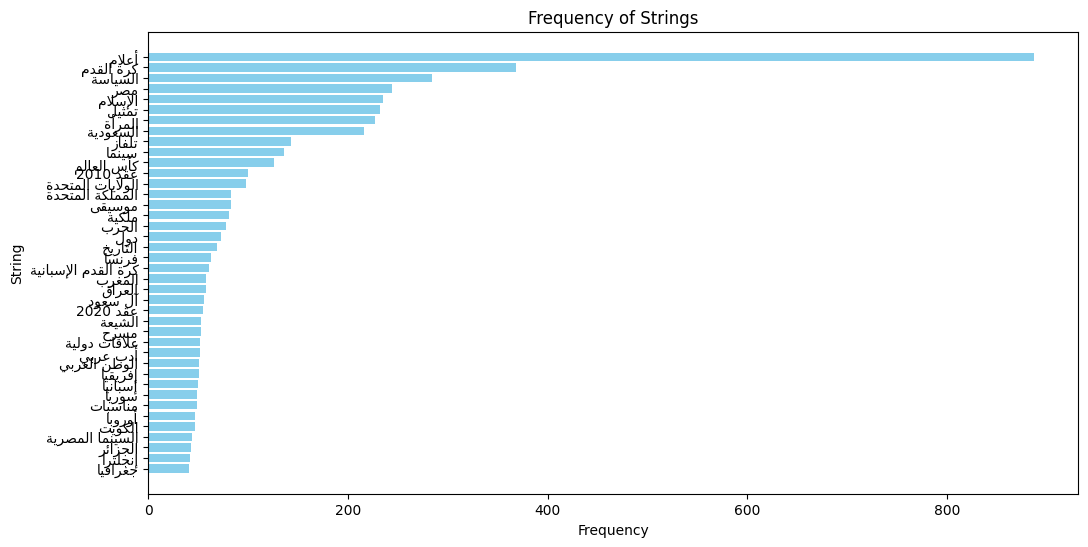

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import arabic_reshaper
from bidi.algorithm import get_display


# Extract labels and counts for plotting
labels, counts = zip(*visualize_sorted_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(reshaped_labels, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('String')
plt.title('Frequency of Strings')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top
plt.show()


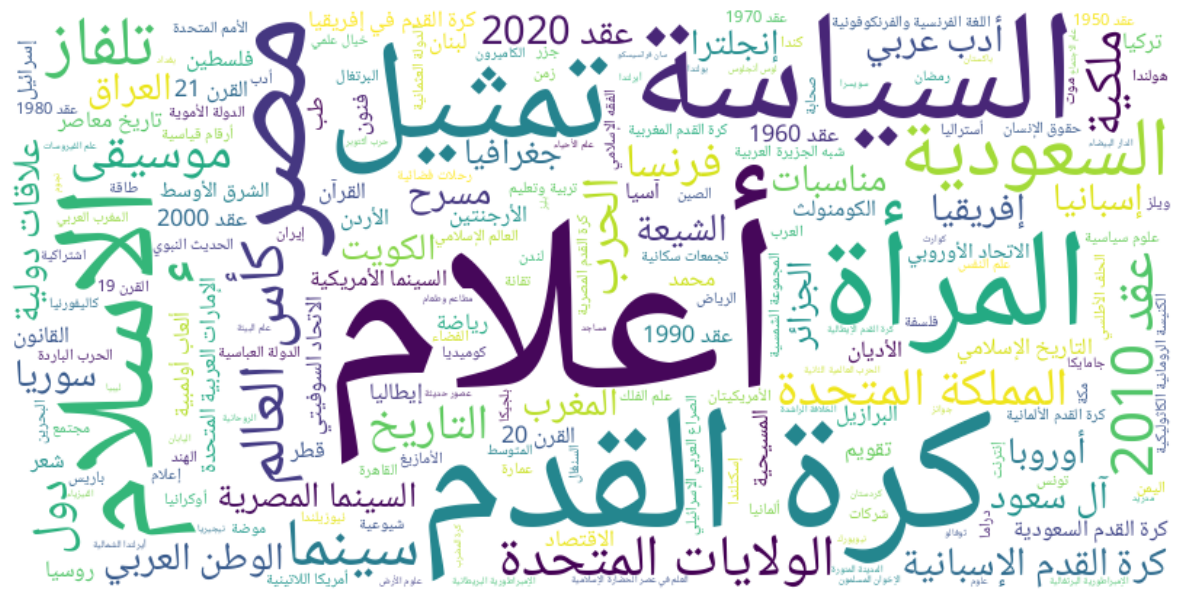

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import itertools


# Create a word cloud with Arabic font
font_path = "/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf"  # Replace with the actual path to an Arabic font file on your system

# Check if the specified font file exists
try:
    with open(font_path, 'rb'):
        pass
except FileNotFoundError:
    raise FileNotFoundError(f"The specified font file '{font_path}' was not found. Please provide the correct path to an Arabic font file.")

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, colormap='viridis').generate_from_frequencies(string_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering in word cloud
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in string_counts.keys()]
text = " ".join(reshaped_labels)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


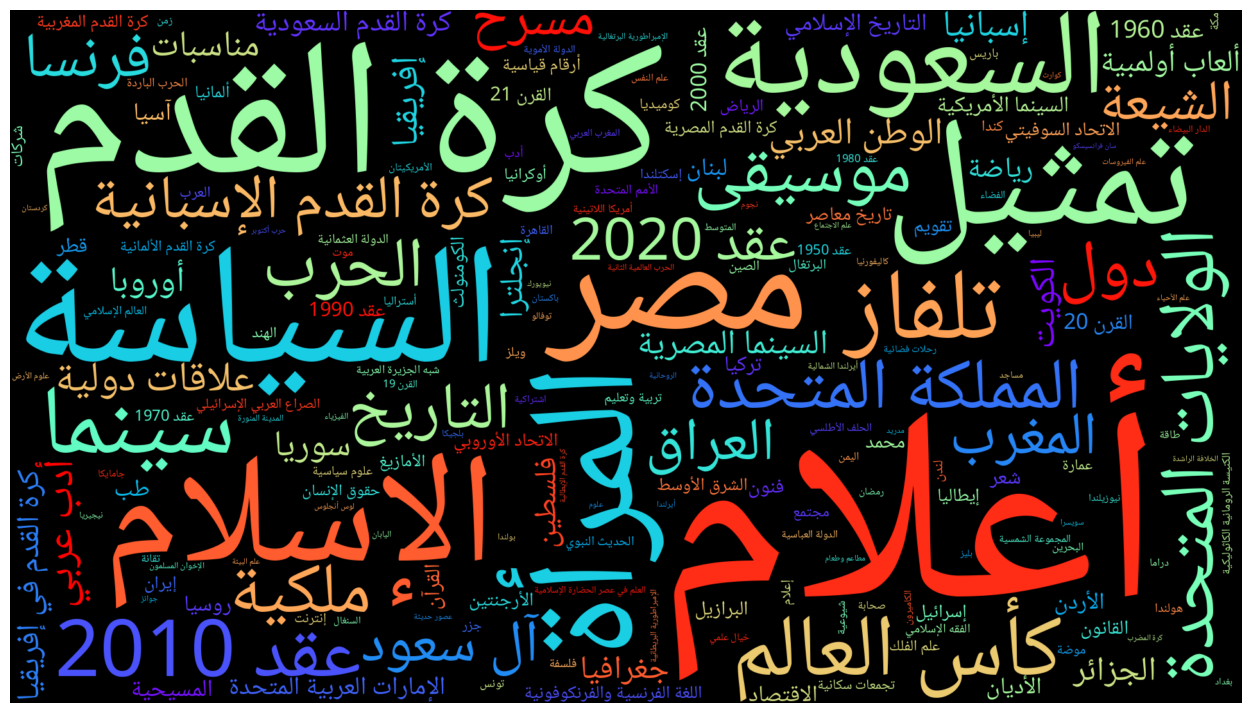

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import itertools

# Create a WordCloud with Arabic font and customized parameters
font_path = "/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf"

# Check if the specified font file exists
try:
    with open(font_path, 'rb'):
        pass
except FileNotFoundError:
    raise FileNotFoundError(f"The specified font file '{font_path}' was not found. Please provide the correct path to an Arabic font file.")

# Create a larger WordCloud
wordcloud = WordCloud(
    width=1920,  # Increase the width and height for higher image quality
    height=1080,
    background_color='black',
    font_path=font_path,
    colormap='rainbow',  # Change the colormap to a more colorful one: rainbow, prism, jet, hsv
    collocations=False,  # Disable collocations to avoid word repetition
).generate_from_frequencies(string_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering in Word Cloud
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in string_counts.keys()]
text = " ".join(reshaped_labels)

# Display the Word Cloud with higher quality and colorful palette
plt.figure(figsize=(16, 9))  # Adjust the figure size for better visibility
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the Word Cloud with higher DPI (dots per inch)
plt.savefig("wordcloud.png", dpi=300, bbox_inches='tight')  # Adjust DPI as needed
plt.show()


In [19]:
import plotly.express as px
import pandas as pd



# Create a DataFrame from the provided data
df = pd.DataFrame(visualize_sorted_counts, columns=['Category', 'Count'])

# Create the TreeMap chart
fig = px.treemap(df, path=['Category'], values='Count')

# Customize the chart appearance (optional)
fig.update_layout(
    title='TreeMap Chart of Categories',
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margins as needed
    uniformtext_minsize=14,
    uniformtext_mode='hide',
)

# Show the chart
fig.show()


In [20]:
import plotly.graph_objects as go

# Given list of tuples with labels, counts, and image URLs
data = [('أعلام', 887, 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Ward_Cunningham_-_Commons-1.jpg/840px-Ward_Cunningham_-_Commons-1.jpg'),
        ('كرة القدم', 368, 'https://upload.wikimedia.org/wikipedia/commons/4/4a/Synthetic_Production_of_Penicillin_TR1468_crop.jpg'),
        ('السياسة', 284, 'https://upload.wikimedia.org/wikipedia/commons/e/ea/NTS_-_ETS-1_002.jpg'),
        # Add more data here
       ]

# Create a list of labels
labels = [item[0] for item in data]

# Create a list of counts
counts = [item[1] for item in data]

# Create a Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=[""] * len(labels),  # All top-level categories have no parent
    values=counts,
))

# Create a custom text for the tooltip that includes the label and value
custom_text = [f"{label}<br>Count: {count}" for label, count, _ in data]

# Update the chart layout to include the custom text in the tooltip
fig.update_traces(text=custom_text, hoverinfo='text')

# Customize the chart appearance
fig.update_layout(
    title='Sunburst Chart with Images',
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margins as needed
)

# Show the chart
fig.show()


In [21]:
top_articles_df

,article,date,views,rank,Page ID,Categories,URL,Image,Summary
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",https://ar.wikipedia.org/wiki/%D9%8A%D9%88%D8%...,https://upload.wikimedia.org/wikipedia/commons...,يوتيوب (بالإنجليزية: YouTube)‏ هو موقع ويب يسم...
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,https://upload.wikimedia.org/wikipedia/commons...,كريستيانو رونالدو دوس سانتوس أفيرو (تلفظ برتغا...
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",https://ar.wikipedia.org/wiki/%D9%85%D8%AD%D9%...,https://upload.wikimedia.org/wikipedia/commons...,أَبُو القَاسِم مُحَمَّدُ بْنُ عَبْدِ ٱللَّهِ ب...
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",https://ar.wikipedia.org/wiki/%D8%A3%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,أبشر، هو نظام إلكتروني أطلقته وزارة الداخلية ا...
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,كأس العالم 2022 هي النسخة الثانية والعشرون من ...
...,...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,بطولة آسيا تحت 23 سنة لكرة القدم 2022 (تعرف أي...
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']",https://ar.wikipedia.org/wiki/%D8%B9%D8%AB%D9%...,https://upload.wikimedia.org/wikipedia/commons...,عثمان بن محمد بن حمد بن عبد الله بن صالح بن مح...
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...",https://ar.wikipedia.org/wiki/%D8%B3%D8%AA%D9%...,https://upload.wikimedia.org/wikipedia/commons...,واردل ستيفن كاري الثاني (ولد في 14 مارس 1988) ...
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']",https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,NaN,البيت بيتي هو مسلسل رعب كوميدي مصري قادم من بط...


In [22]:
# Drop three columns (A, C, and E)
columns_to_drop = ['URL', 'Image', 'Summary']
smaller_df = top_articles_df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد..."
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس..."
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'..."
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '..."
...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']"
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']"
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح..."
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']"


In [23]:
smaller_df_country = smaller_df
smaller_df_type = smaller_df
smaller_df_field = smaller_df
smaller_df_field

,article,date,views,rank,Page ID,Categories
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد..."
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس..."
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'..."
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '..."
...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']"
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']"
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح..."
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']"


## Adding Country

In [24]:
import re

# Define a function to extract countries from the categories
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        matches = re.findall(country_pattern, categories)
        return ', '.join(matches)
    return ''

# Apply the function to create the "country" column
smaller_df_country['Country'] = smaller_df_country['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df_country

,article,date,views,rank,Page ID,Categories,Country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","السعودية, السعودية"
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']",الكويت
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...",
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']",مصر


In [25]:
import pandas as pd
import re


# Define a function to extract countries from the categories
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        matches = re.findall(country_pattern, categories)
        if matches:
            unique_countries = set(matches)  # Remove duplicates by converting to a set
            return ', '.join(unique_countries)
        else:
            return 'غير عرب'
    return ''

# Apply the function to create the "country" column
smaller_df_country['Country'] = smaller_df_country['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df_country

,article,date,views,rank,Page ID,Categories,Country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",غير عرب
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",السعودية
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",غير عرب
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",غير عرب
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']",الكويت
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...",غير عرب
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']",مصر


In [26]:
import pandas as pd
import re

# Your existing DataFrame top_articles_df with a "Categories" column
# ...

# Define a function to extract countries from the categories and add "آسيا", "أوروبا", "أفريقيا", "أمريكا الشمالية", and "أمريكا الجنوبية"
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        asia_countries_pattern = r'(الصين|الهند|اليابان|كوريا الجنوبية|تايلاند|ماليزيا|سنغافورة|إندونيسيا|باكستان|بنغلاديش|تركيا|إيران|أفغانستان|قيرغيزستان|كازاخستان|أوزبكستان|تركمانستان|مغرب الصين الشرقي|تايوان|كوريا الشمالية|منغوليا|الفلبين|فيتنام|لاوس|كمبوديا|نيبال|سريلانكا|بوتان|بروناي|ميانمار|بورما|تاجيكستان|جورجيا|أرمينيا|أذربيجان|طاجيكستان|كيرجيزستان|تركمانستان|أوزبكستان|سريلانكا|بوتان|مالديف|ماليزيا|سنغافورة|بروناي|تيمور الشرقية|منغوليا|كوريا الشمالية)'
        europe_countries_pattern = r'(ألبانيا|أندورا|النمسا|بيلاروسيا|بلجيكا|البوسنة والهرسك|بلغاريا|كرواتيا|قبرص|التشيك|الدنمارك|إستونيا|جمهورية مقدونيا الشمالية|فنلندا|فرنسا|ألمانيا|اليونان|هنغاريا|آيسلندا|إيرلندا|إيطاليا|كوسوف|لاتفيا|ليشتنشتاي|ليتوانيا|لوكسمبورغ|مالطا|مولدوفا|موناكو|الجبل الأسود|هولندا|النرويج|بولندا|البرتغال|رومانيا|روسيا|سان مارينو|صربيا|سلوفاكيا|سلوفينيا|إسبانيا|السويد|سويسرا|أوكرانيا|المملكة المتحدة|الفاتيكان)'
        african_countries_pattern = r'(أثيوبيا|أسواتيني|بوتسوانا|بوروندي|بنين|بوركينا فاسو|جمهورية أفريقيا الوسطى|جمهورية الكونغو|جمهورية الكونغو الديمقراطية|جمهورية كوت ديفوار|جيبوتي|زامبيا|زيمبابوي|الجابون|الغابون|الكاميرون|الكينيا|النيجر|النيجريا|ليبيريا|ليسوتو|مالاوي|مدغشقر|ناميبيا|سوازيلاند|سيراليون|ساحل العاج|سنغال|غامبيا|غانا|غينيا|غينيا بيساو|غينيا الاستوائية|توجو|تونس|تنزانيا|جزر القمر|جزر سانت تومي وبرينسيبي|جزر سيشل|جزر موريشيوس|جمهورية مدغشقر|جمهورية موريتانيا|جنوب السودان)'
        north_america_countries_pattern = r'(الولايات المتحدة|كندا|المكسيك|جزر البهاما|كوبا|هايتي|جمهورية الدومينيكان|جامايكا|ترينيداد وتوباغو|سانت كيتس ونيفيس|أنتيغوا وبربودا|سانت لوسيا|سانت فينسنت والجرينادين|باربادوس|غرينادا|بليز|هندوراس|جمهورية نيكاراغوا|كوستاريكا|بنما|سلفادور|غواتيمالا|بليز|كوستا ريكا|بنما|سلفادور|غواتيمالا|بليز)'

        south_america_countries_pattern = r'(الأرجنتين|بوليفيا|البرازيل|تشيلي|كولومبيا|الإكوادور|غيانا|باراغواي|بيرو|سورينام|أوروغواي|فنزويلا)'

        matches = re.findall(country_pattern, categories)

        if re.search(asia_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('آسيا')

        if re.search(europe_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أوروبا')

        if re.search(african_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أفريقيا')


        if re.search(north_america_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أمريكا الشمالية')

        if re.search(south_america_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أمريكا الجنوبية')

        if matches:
            unique_countries = set(matches)  # Remove duplicates by converting to a set
            return ', '.join(unique_countries)
        else:
            return 'اخرى'

    return ''

# Apply the function to create the "country" column
smaller_df_country['Country'] = smaller_df_country['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df_country

,article,date,views,rank,Page ID,Categories,Country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية"
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, اجنبي"
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']",الكويت
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية"
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']",مصر


In [27]:
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        asia_countries_pattern = r'(الصين|الهند|اليابان|كوريا الجنوبية|تايلاند|ماليزيا|سنغافورة|إندونيسيا|باكستان|بنغلاديش|تركيا|إيران|أفغانستان|قيرغيزستان|كازاخستان|أوزبكستان|تركمانستان|مغرب الصين الشرقي|تايوان|كوريا الشمالية|منغوليا|الفلبين|فيتنام|لاوس|كمبوديا|نيبال|سريلانكا|بوتان|بروناي|ميانمار|بورما|تاجيكستان|جورجيا|أرمينيا|أذربيجان|طاجيكستان|كيرجيزستان|تركمانستان|أوزبكستان|سريلانكا|بوتان|مالديف|ماليزيا|سنغافورة|بروناي|تيمور الشرقية|منغوليا|كوريا الشمالية)'
        europe_countries_pattern = r'(ألبانيا|أندورا|النمسا|بيلاروسيا|بلجيكا|البوسنة والهرسك|بلغاريا|كرواتيا|قبرص|التشيك|الدنمارك|إستونيا|جمهورية مقدونيا الشمالية|فنلندا|فرنسا|ألمانيا|اليونان|هنغاريا|آيسلندا|إيرلندا|إيطاليا|كوسوف|لاتفيا|ليشتنشتاي|ليتوانيا|لوكسمبورغ|مالطا|مولدوفا|موناكو|الجبل الأسود|هولندا|النرويج|بولندا|البرتغال|رومانيا|روسيا|سان مارينو|صربيا|سلوفاكيا|سلوفينيا|إسبانيا|السويد|سويسرا|أوكرانيا|المملكة المتحدة|الفاتيكان)'
        african_countries_pattern = r'(أثيوبيا|أسواتيني|بوتسوانا|بوروندي|بنين|بوركينا فاسو|جمهورية أفريقيا الوسطى|جمهورية الكونغو|جمهورية الكونغو الديمقراطية|جمهورية كوت ديفوار|جيبوتي|زامبيا|زيمبابوي|الجابون|الغابون|الكاميرون|الكينيا|النيجر|النيجريا|ليبيريا|ليسوتو|مالاوي|مدغشقر|ناميبيا|سوازيلاند|سيراليون|ساحل العاج|سنغال|غامبيا|غانا|غينيا|غينيا بيساو|غينيا الاستوائية|توجو|تونس|تنزانيا|جزر القمر|جزر سانت تومي وبرينسيبي|جزر سيشل|جزر موريشيوس|جمهورية مدغشقر|جمهورية موريتانيا|جنوب السودان)'
        north_america_countries_pattern = r'(الولايات المتحدة|كندا|المكسيك|جزر البهاما|كوبا|هايتي|جمهورية الدومينيكان|جامايكا|ترينيداد وتوباغو|سانت كيتس ونيفيس|أنتيغوا وبربودا|سانت لوسيا|سانت فينسنت والجرينادين|باربادوس|غرينادا|بليز|هندوراس|جمهورية نيكاراغوا|كوستاريكا|بنما|سلفادور|غواتيمالا|بليز|كوستا ريكا|بنما|سلفادور|غواتيمالا|بليز)'

        south_america_countries_pattern = r'(الأرجنتين|بوليفيا|البرازيل|تشيلي|كولومبيا|الإكوادور|غيانا|باراغواي|بيرو|سورينام|أوروغواي|فنزويلا)'

        # Add 'عرب' to the list of matches
        matches = re.findall(country_pattern, categories)
        if matches:
            matches.append('عرب')

        if re.search(asia_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('آسيا')

        if re.search(europe_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أوروبا')

        if re.search(african_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أفريقيا')


        if re.search(north_america_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أمريكا الشمالية')

        if re.search(south_america_countries_pattern, categories):
          matches.append('اجنبي')
          matches.append('أمريكا الجنوبية')

        if matches:
            unique_countries = set(matches)  # Remove duplicates by converting to a set
            return ', '.join(unique_countries)
        else:
            return 'اخرى'

    return ''

# Apply the function to create the "Country" column
smaller_df_country['Country'] = smaller_df_country['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df_country


,article,date,views,rank,Page ID,Categories,Country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية"
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, عرب, اجنبي"
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']","السعودية, عرب"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...","عرب, قطر"
...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']","عرب, الكويت"
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية"
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']","مصر, عرب"


## Adding the Type category

In [28]:
import pandas as pd
import numpy as np  # Import numpy for handling NaN values

# Assuming you have a DataFrame called smaller_df with a "Categories" column

# Define a function to categorize the rows based on the presence of words
def categorize_type(row):
    if isinstance(row, str):  # Check if the input is a string
        if "المرأة" in row:
            return "نساء"
        elif "أعلام" in row:
            return "رجال"
        elif "مناسبات" in row:
            return "مناسبات"
    return "اخر"

# Handle NaN values in the "Categories" column by filling them with an empty string
smaller_df_type['Categories'] = smaller_df_type['Categories'].fillna('')

# Apply the categorize_type function to create the "Type" column
smaller_df_type['Type'] = smaller_df_type['Categories'].apply(categorize_type)

# Print the updated DataFrame
smaller_df_type

,article,date,views,rank,Page ID,Categories,Country,Type
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية",اخر
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, عرب, اجنبي",رجال
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى,رجال
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']","السعودية, عرب",اخر
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...","عرب, قطر",اخر
...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى,اخر
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']","عرب, الكويت",رجال
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية",نساء
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']","مصر, عرب",اخر


## Adding the Field category

In [29]:
import pandas as pd

# Assuming you have a DataFrame called smaller_df with a "Categories" column

# Define a function to categorize the rows based on the presence of words
def categorize_field(row):
    if isinstance(row, str):  # Check if the input is a string
        if "كأس العالم" in row or "ألعاب أولمبية" in row or "كرة القدم" in row or "رياضة" in row or "سباحة" in row or "كرة اليد" in row or "كرة المضرب" in row or "مصارعة" in row:
            return "sports"

        # because countries also have 'languages' which is categorized under 'arts'
        elif "دول" in row or "جزر" in row or "جغرافيا" in row:
            return "locations"

        # Because Stephen Hawking also categorized under 'English literature'
        elif "علم" in row or "علوم" in row or "طب" in row or "تقانة" in row or "تجمعات سكانية" in row or "زراعة" in row or "تعليم" in row or "بيطرة" in row or "شركات" in row or "إلكترونية" in row:
            return "science"

        # politics before arts because ( 'تمثيل', 'سينما',) فولوديمير زيلينسكي and صدام حسين ('أدب عربي')
        elif "السياسة" in row or "ملكية" in row or "الاقتصاد" in row or "الحرب" in row or "القانون" in row or "حقوق" in row or "صراع" in row or "حرب" in row or "آل سعود" in row:
            return "politicsneconomy"
        elif "تمثيل" in row or "سينما" in row or "أدب" in row or "موسيقى" in row or "فنون" in row or "تلفاز" in row or "ثقافة" in row or "موضة" in row or "إعلام" in row \
         or "مسرح" in row or "دراما" in row or "فلكلور" in row:
            return "art"

        elif "الإسلام" in row or "الأديان" in row or "الشيعة" in row or "المسيحية" in row or "اليهودية" in row or "الجاينية" in row or "السيخية" in row or "الهندوسية" in row:
            return "religion"


    return "z"

# Apply the categorize_field function to create the "Field" column
smaller_df_field['Field'] = smaller_df_field['Categories'].apply(categorize_field)

# Print the updated DataFrame
smaller_df_field

,article,date,views,rank,Page ID,Categories,Country,Type,Field
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية",اخر,science
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, عرب, اجنبي",رجال,sports
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى,رجال,politicsneconomy
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']","السعودية, عرب",اخر,politicsneconomy
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...","عرب, قطر",اخر,sports
...,...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى,اخر,sports
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']","عرب, الكويت",رجال,art
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية",نساء,sports
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']","مصر, عرب",اخر,art


In [30]:
import pandas as pd
import re

# Assuming you have a DataFrame called smaller_df with a "Categories" column

# Define a function to categorize the rows based on the presence of words
def categorize_field(row):
    if isinstance(row, str):  # Check if the input is a string
        if re.search(r'\bكأس العالم\b|\bألعاب أولمبية\b|\bكرة القدم\b|\bرياضة\b|\bسباحة\b|\bكرة اليد\b|\bكرة المضرب\b|\bمصارعة\b', row):
            return "sports"

        # Use word boundaries for "السياسة" to match exactly
        elif re.search(r'\bالسياسة\b|\bملكية\b|\bالاقتصاد\b|\bالحرب\b|\bالقانون\b|\bحقوق\b|\bصراع\b|\bحرب\b|\bآل سعود\b', row):
            return "politicsneconomy"

        # Use word boundaries for "دول" and "جزر" to match exactly
        elif re.search(r'\bدول\b|\bجزر\b|\bجغرافيا\b', row):
            return "locations"

        # Use word boundaries for "الإسلام" to match exactly
        elif re.search(r'\bالإسلام\b|\bالأديان\b|\bالشيعة\b|\bالمسيحية\b|\bاليهودية\b|\bالجاينية\b|\bالسيخية\b|\bالهندوسية\b', row):
            return "religion"

        # Use word boundaries for "علم" and "علوم" to match exactly
        elif re.search(r'\bعلم\b|\bعلوم\b|\bطب\b|\bتقانة\b|\bتجمعات سكانية\b|\bزراعة\b|\bتعليم\b|\bبيطرة\b|\bشركات\b|\bإلكترونية\b', row):
            return "science"


        # Use word boundaries for "تمثيل" to match exactly
        elif re.search(r'\bتمثيل\b|\bسينما\b|\bأدب\b|\bموسيقى\b|\bفنون\b|\bتلفاز\b|\bثقافة\b|\bموضة\b|\bإعلام\b|\bمسرح\b|\bدراما\b|\bفلكلور\b|\كوميديا\b', row):
            return "art"



    return "z"

# Apply the categorize_field function to create the "Field" column     ألعاب فيديو
smaller_df_field['Field'] = smaller_df_field['Categories'].apply(categorize_field)

# Print the updated DataFrame
smaller_df_field


,article,date,views,rank,Page ID,Categories,Country,Type,Field
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية",اخر,science
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, عرب, اجنبي",رجال,sports
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى,رجال,politicsneconomy
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']","السعودية, عرب",اخر,politicsneconomy
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...","عرب, قطر",اخر,sports
...,...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى,اخر,sports
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']","عرب, الكويت",رجال,art
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية",نساء,sports
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']","مصر, عرب",اخر,art


## Category Manual Updates

In [45]:
smaller_df.iloc[139]

article                                             كاظم الساهر
date                                                 12/01/2022
views                                                     23615
rank                                                         12
Page ID                                                 13723.0
Categories    ['أعلام', 'العراق', 'المرأة', 'المغرب', 'الموص...
Country        أمريكا الشمالية, العراق, عرب, المغرب, قطر, اجنبي
Type                                                       رجال
Field                                                       art
Name: 139, dtype: object

In [43]:
smaller_df.at[139, 'Type'] = 'رجال'
smaller_df.iloc[139]['Type']

In [32]:
z_count = (smaller_df_field['Field'] == 'z').sum()
print(f"Number of rows with 'z' in the 'Field' column: {z_count}")
# 95

Number of rows with 'z' in the 'Field' column: 110


In [44]:
smaller_df_field

,article,date,views,rank,Page ID,Categories,Country,Type,Field
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","اجنبي, أمريكا الشمالية",اخر,science
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","أوروبا, السعودية, عرب, اجنبي",رجال,sports
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى,رجال,politicsneconomy
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']","السعودية, عرب",اخر,politicsneconomy
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...","عرب, قطر",اخر,sports
...,...,...,...,...,...,...,...,...,...
1627,كأس آسيا تحت 23 سنة لكرة القدم 2022,19/06/2022,2948,1,8663654.0,"['آسيا', 'كرة القدم']",اخرى,اخر,sports
1628,عثمان الخميس,18/06/2022,2925,1,302897.0,"['أدب عربي', 'أعلام', 'الكويت']","عرب, الكويت",رجال,art
1629,ستيفن كاري,17/06/2022,2907,1,2531156.0,"['أعلام', 'إسبانيا', 'المرأة', 'الولايات المتح...","أوروبا, اجنبي, أمريكا الشمالية",نساء,sports
1630,البيت بيتي (مسلسل),23/06/2022,2897,1,8735738.0,"['تلفاز', 'تمثيل', 'مصر']","مصر, عرب",اخر,art


In [46]:
duplicates = smaller_df[smaller_df.duplicated(subset='Page ID', keep=False)]
duplicates

,article,date,views,rank,Page ID,Categories,Country,Type,Field
62,من شارع الهرم إلى... (مسلسل),09/04/2022,12146,25,8709635.0,"['تلفاز', 'دراما', 'فنون']",اخرى,اخر,art
85,الحرب الروسية الأوكرانية,24/02/2022,35312,19,1964325.0,"['أوكرانيا', 'الاتحاد الأوروبي', 'الحرب', 'الس...","أوروبا, اجنبي",اخر,politicsneconomy
100,تشارلز الثالث,08/09/2022,129585,15,83145.0,"['أستراليا', 'أعلام', 'أيرلندا الشمالية', 'إسك...","أوروبا, اجنبي, أمريكا الشمالية",رجال,politicsneconomy
107,عاشوراء,29/07/2022,142006,14,40104.0,"['الأديان', 'الإسلام', 'الشيعة', 'تربية وتعليم...",اخرى,مناسبات,religion
132,خليفة بن زايد آل نهيان,05/05/2022,551277,12,88344.0,"['أعلام', 'الإمارات العربية المتحدة', 'السياسة...","عرب, الإمارات العربية المتحدة",رجال,politicsneconomy
...,...,...,...,...,...,...,...,...,...
1438,محمد العربي,10/01/2022,4620,1,1250802.0,"['أعلام', 'الإسلام', 'مصر']","مصر, عرب",رجال,religion
1506,أرق مميت,16/03/2022,4214,1,413825.0,['طب'],اخرى,اخر,science
1513,الحياة الدينية في مصر القديمة,26/01/2022,4161,1,300479.0,"['التاريخ', 'تاريخ إفريقيا', 'دول', 'مصر', 'مص...","مصر, عرب",اخر,locations
1516,بسمة بنت سعود بن عبد العزيز آل سعود,10/01/2022,4153,1,17648.0,"['آل سعود', 'أدب عربي', 'أعلام', 'السعودية', '...","السعودية, عرب",رجال,politicsneconomy


In [33]:
stop

NameError: ignored

## Merging all columns

In [ ]:
smaller_df

In [ ]:
top_articles_df

In [ ]:
stop

In [ ]:
smaller_df.to_csv('/content/drive/MyDrive/ai_data/w_top_categories_2022.csv', encoding='utf-8-sig', index=False)

## stop & save

In [ ]:
sorted_counts

In [ ]:
from wordcloud import WordCloud

# Flatten the list of lists into a single list
flat_list = list(itertools.chain.from_iterable(list_of_lists))

# Count the frequency of each string
string_counts = Counter(flat_list)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(string_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install python-bidi
import pandas as pd
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(width=700, height=300, background_color="white").generate(arabic_text)
wordcloud.to_image()

In [ ]:
!pip install ar_wordcloud

from ar_wordcloud import ArabicWordCloud
awc = ArabicWordCloud(background_color="white")

text = 'أهلاً وسهلا، اللغة العربية جميلة'
wc = awc.from_text(text)


In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf').generate(bidi_text)
wordcloud.to_file("worCloud.png")

In [ ]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper

# Assuming you already have 'sorted_counts' as a list of tuples (label, count)
# Example: sorted_counts = [('أعلام', 3), ('إسبانيا', 2), ('جوجل', 2), ...]

# Extract the labels from sorted_counts
labels, _ = zip(*sorted_counts)

# Combine the labels into a single string
data = " ".join(labels)

# Apply Arabic reshaping and BiDi algorithm
data = arabic_reshaper.reshape(data)
data = get_display(data)

# Create a WordCloud
wordcloud = WordCloud(
    font_path='/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf',  # Replace with the path to an Arabic font file if needed
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(data)

# Display the WordCloud
plt.title("Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
NotoNaskhArabic-Regular

In [ ]:
stop

In [ ]:
# Given list of lists
list_of_lists = [['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا'],
                 ['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية'],
                 ['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة'],
                 ['السعودية', 'برمجيات', 'حقوق الإنسان']]

# Flatten the list of lists into a single list
flat_list = list(itertools.chain.from_iterable(list_of_lists))

# Count the frequency of each string
string_counts = Counter(flat_list)

# Sort the string counts from highest frequency to lowest
sorted_counts = string_counts.most_common()


In [ ]:
from collections import Counter

# Flatten the list of lists into a single list
flat_list = [item for sublist in list_of_lists for item in sublist]

# Count the frequency of each string
string_counts = Counter(flat_list)



In [ ]:
string_counts

In [ ]:
from collections import Counter

In [ ]:
# Drop rows with missing values in the "Categories" column (or you can choose to handle them differently)
top_articles_df_cleaned = top_articles_df.dropna(subset=['Categories'])

In [ ]:
label_counts = Counter(label for labels in top_articles_df_cleaned['Categories'] for label in labels)
label_counts